In [14]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('final.csv')
data.head()

,NO,KELURAHAN,KECAMATAN,KABUPATEN,OBJECT,MERK,JENIS,DP NET,TENOR
0,1,72,CIMAHI UTARA,KOTA CIMAHI,1,18,163,5300000,29
1,2,154,PARONGPONG,KAB. BANDUNG,1,6,243,74000000,12
2,3,185,CIMAHI SELATAN,KOTA CIMAHI,0,3,21,5000000,27
3,4,73,CIDADAP,KOTA BANDUNG,1,3,28,2800000,23
4,5,50,NGAMPRAH,BANDUNG BARAT,0,6,45,4000000,35


In [15]:
df = data.drop(['KECAMATAN', 'KABUPATEN', 'NO'], axis=1)
df.head()

,KELURAHAN,OBJECT,MERK,JENIS,DP NET,TENOR
0,72,1,18,163,5300000,29
1,154,1,6,243,74000000,12
2,185,0,3,21,5000000,27
3,73,1,3,28,2800000,23
4,50,0,6,45,4000000,35


In [20]:
X = df.iloc[:,0:7].values
X [:5]

array([[      72,        1,       18,      163,  5300000,       29],
       [     154,        1,        6,      243, 74000000,       12],
       [     185,        0,        3,       21,  5000000,       27],
       [      73,        1,        3,       28,  2800000,       23],
       [      50,        0,        6,       45,  4000000,       35]],
      dtype=int64)

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5]

array([[-0.42484572,  0.98565947,  1.44075211,  0.80831695,  0.20151801,
         0.31143362],
       [ 1.10430309,  0.98565947, -0.30264879,  1.80383908, 19.75538754,
        -1.90672616],
       [ 1.68239593, -1.01454918, -0.73849901, -0.95873483,  0.11612993,
         0.05047364],
       [-0.40619756,  0.98565947, -0.73849901, -0.87162665, -0.5100493 ,
        -0.4714463 ],
       [-0.83510515, -1.01454918, -0.30264879, -0.66007819, -0.16849699,
         1.09431354]])

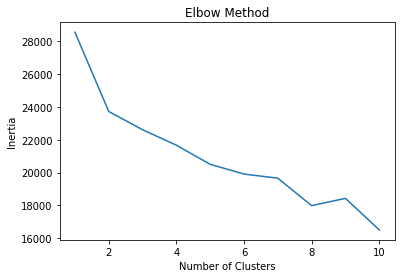

In [18]:
inertia_values = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, metric='euclidean', random_state=42)
    kmedoids.fit(X)
    inertia_values.append(kmedoids.inertia_)

# Visualisasi hasil metode elbow
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [31]:
# Menggunakan K-Medoids untuk clustering
num_clusters = 2  # Jumlah cluster yang ditentukan
kmedoids = KMedoids(n_clusters=num_clusters, metric='euclidean', random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

# Menambahkan label cluster ke dalam DataFrame
data['f_cluster'] = y_kmedoids 

# Menampilkan hasil cluster pada DataFrame
print(data.head(5))

   NO  KELURAHAN       KECAMATAN      KABUPATEN  OBJECT  MERK  JENIS  \
0   1         72    CIMAHI UTARA    KOTA CIMAHI       1    18    163   
1   2        154      PARONGPONG   KAB. BANDUNG       1     6    243   
2   3        185  CIMAHI SELATAN    KOTA CIMAHI       0     3     21   
3   4         73         CIDADAP   KOTA BANDUNG       1     3     28   
4   5         50        NGAMPRAH  BANDUNG BARAT       0     6     45   

     DP NET  TENOR  f_cluster  
0   5300000     29          0  
1  74000000     12          0  
2   5000000     27          1  
3   2800000     23          0  
4   4000000     35          1  


In [32]:
data['f_cluster'].value_counts()

f_cluster
0    5780
1    5367
Name: count, dtype: int64

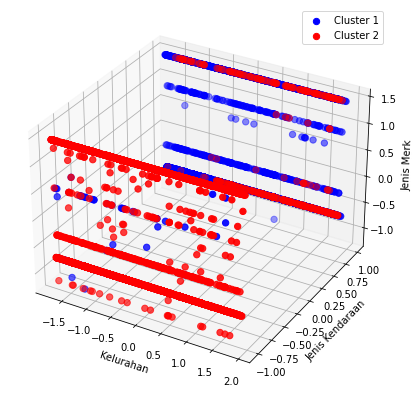

In [36]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Menentukan warna untuk setiap cluster
colors = ['blue', 'red', 'magenta', 'green', 'black']

# Menggambar setiap titik data berdasarkan klusternya
for cluster_label in range(num_clusters):
    ax.scatter(X[y_kmedoids == cluster_label, 0], 
               X[y_kmedoids == cluster_label, 1], 
               X[y_kmedoids == cluster_label, 2], 
               s=40, color=colors[cluster_label], label=f"Cluster {cluster_label + 1}")

ax.set_xlabel('Kelurahan')
ax.set_ylabel('Jenis Kendaraan')
ax.set_zlabel('Jenis Merk')
ax.legend()
plt.show()

In [33]:
data.to_csv('medoids.csv', index=False)

In [21]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd
result = {}

# Loop untuk berbagai jumlah klaster
for i in range(2, 11):
    kmedoids = KMedoids(n_clusters=i, metric='euclidean', random_state=42)
    labels = kmedoids.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    result[i] = db_index

# Menampilkan hasil indeks Davies-Bouldin untuk setiap jumlah klaster
for num_clusters, db_index in result.items():
    print(f"Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}")

Number of Clusters: 2, Davies-Bouldin Index: 0.7126585452202918
Number of Clusters: 3, Davies-Bouldin Index: 0.6192721315487313
Number of Clusters: 4, Davies-Bouldin Index: 0.6421233823377862
Number of Clusters: 5, Davies-Bouldin Index: 0.6198033864497027
Number of Clusters: 6, Davies-Bouldin Index: 0.5804049931374277
Number of Clusters: 7, Davies-Bouldin Index: 0.5593492092630445
Number of Clusters: 8, Davies-Bouldin Index: 0.5525605485805487
Number of Clusters: 9, Davies-Bouldin Index: 0.5595818838826151
Number of Clusters: 10, Davies-Bouldin Index: 0.5477563891523735


In [22]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd

# Menggantikan X dengan data Anda


kmedoids = KMedoids(n_clusters=2, metric='euclidean', random_state=42)
labels = kmedoids.fit_predict(X)
db_index = davies_bouldin_score(X, labels)

print(f"Number of Clusters: 2, Davies-Bouldin Index: {db_index}")


Number of Clusters: 2, Davies-Bouldin Index: 0.7126585452202918


c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


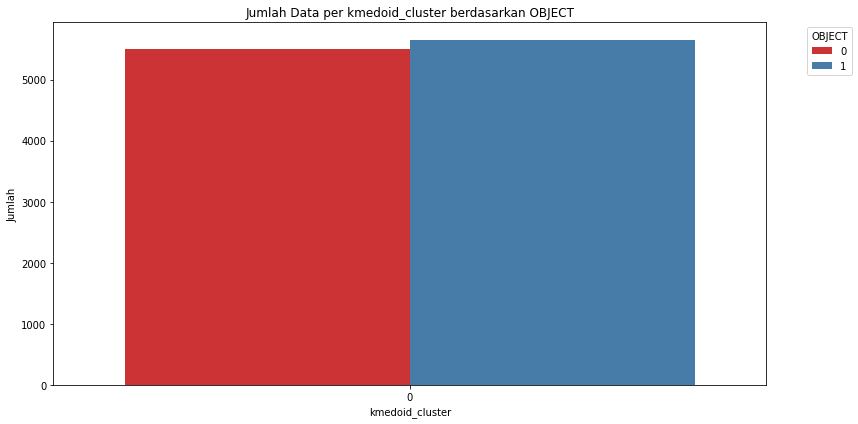

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Melakukan one-hot encoding pada kolom 'MERK' dan 'JENIS'
encoded_data = pd.get_dummies(dataset[['MERK', 'JENIS']])

# Menggunakan K-Medoids dengan 3 kluster
n_clusters = 3
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
cluster_labels = kmedoids.fit_predict(encoded_data)

# Menambahkan kolom 'kmedoid_cluster' ke dalam dataset
dataset['kmedoid_cluster'] = cluster_labels

# Membuat plot bar berdasarkan nilai objek 'kmedoid_cluster' dengan nilai-nilai berdasarkan jumlah data dalam setiap objek pada 'OBJECT' dan 'JENIS'
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='kmedoid_cluster', hue='OBJECT', palette='Set1')
plt.xlabel('kmedoid_cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Data per kmedoid_cluster berdasarkan OBJECT')
plt.legend(title='OBJECT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


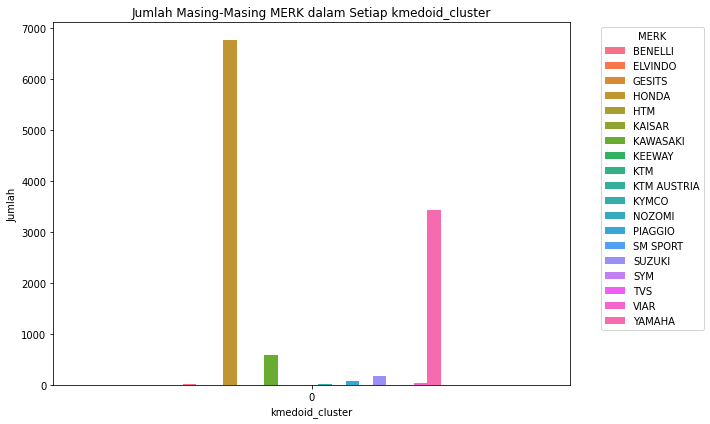

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'MERK' dan 'f_cluster' menjadi 'MERK_CLUSTER'
dataset['MERK_CLUSTER'] = dataset['MERK'] + ' - ' + dataset['f_cluster'].astype(str)

# Melakukan one-hot encoding pada kolom 'MERK_CLUSTER'
encoded_data = pd.get_dummies(dataset['MERK_CLUSTER'])

# Menggunakan K-Medoids dengan 3 kluster
n_clusters = 2
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
cluster_labels = kmedoids.fit_predict(encoded_data)

# Menambahkan kolom 'kmedoid_cluster' ke dalam dataset
dataset['kmedoid_cluster'] = cluster_labels

# Menghitung jumlah masing-masing 'MERK' dalam setiap kmedoid_cluster
merk_group_by_kmedoid = dataset.groupby(['kmedoid_cluster', 'MERK'])['MERK'].count()

# Membuat palet warna yang berbeda untuk setiap 'MERK'
merk_palette = sns.color_palette("husl", n_colors=len(dataset['MERK'].unique()))

# Membuat plot bar untuk Jumlah Masing-Masing MERK dalam Setiap kmedoid_cluster
fig, ax = plt.subplots(figsize=(10, 6))
merk_group_by_kmedoid.unstack().plot(kind='bar', ax=ax, color=merk_palette)
ax.set_xlabel('kmedoid_cluster')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Masing-Masing MERK dalam Setiap kmedoid_cluster')
ax.legend(title='MERK', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


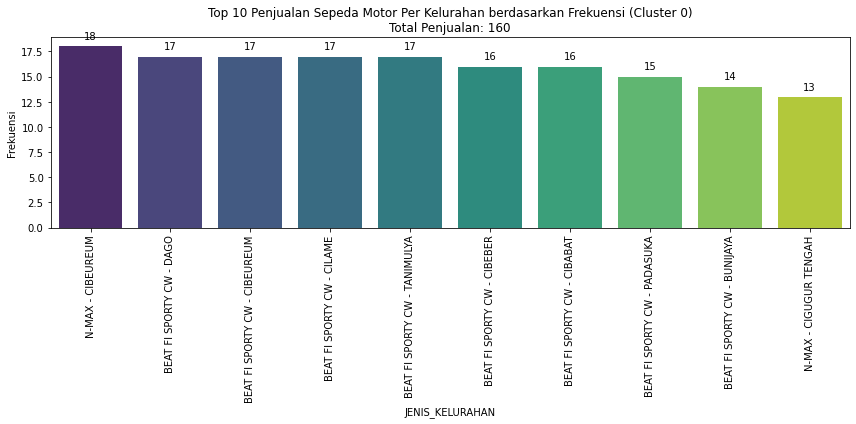

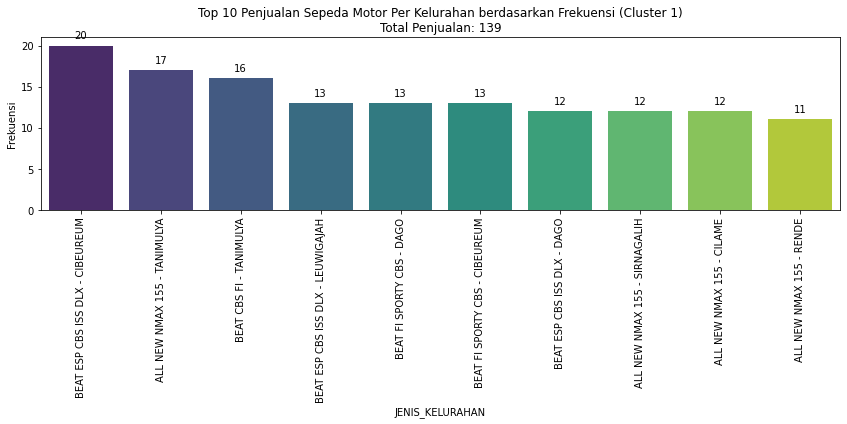

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'JENIS' dan 'KELURAHAN' menjadi satu kolom baru
dataset['JENIS_KELURAHAN'] = dataset['JENIS'] + ' - ' + dataset['KELURAHAN']

# Memfilter data hanya untuk yang memiliki 100 baris atau lebih
if len(dataset) >= 100:
    # Membuat fungsi untuk membuat plot bar
    def create_cluster_bar_plot(data, cluster_number):
        cluster_data = data[data['f_cluster'] == cluster_number]
        if not cluster_data.empty:  # Periksa apakah ada data yang cocok dengan kluster
            plt.figure(figsize=(12, 6))
            jenis_kabupaten_counts = cluster_data['JENIS_KELURAHAN'].value_counts().head(10)
            total_penjualan = jenis_kabupaten_counts.sum()
            ax = sns.barplot(x=jenis_kabupaten_counts.index, y=jenis_kabupaten_counts.values, palette='viridis')
            plt.xlabel('JENIS_KELURAHAN')
            plt.ylabel('Frekuensi')
            plt.title(f'Top 10 Penjualan Sepeda Motor Per Kelurahan berdasarkan Frekuensi (Cluster {cluster_number})\nTotal Penjualan: {total_penjualan}')
            plt.xticks(rotation=90)
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Tidak ada data untuk Cluster {cluster_number}.")

    # Membuat plot bar untuk Cluster 1
    create_cluster_bar_plot(dataset, cluster_number=0)

    # Membuat plot bar untuk Cluster 2
    create_cluster_bar_plot(dataset, cluster_number=1)
else:
    print("Data tidak mencukupi untuk menampilkan plot bar.")


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'JENIS' dan 'KELURAHAN' menjadi satu kolom baru
dataset['JENIS_KEL_CLUSTER'] = dataset['JENIS'] + ' - ' + dataset['KELURAHAN']

# Menghitung frekuensi kemunculan kombinasi 'JENIS_KEL_CLUSTER'
jenis_kelurahan_counts = dataset['JENIS_KEL_CLUSTER'].value_counts()

# Menambahkan kolom 'MERK' ke samping kolom 'KELURAHAN'
jenis_kelurahan_merk_counts = pd.concat([jenis_kelurahan_counts, dataset.groupby('JENIS_KEL_CLUSTER')['MERK'].unique()], axis=1)
jenis_kelurahan_merk_counts.columns = ['Frekuensi', 'MERK']

# Mengelompokkan data berdasarkan 'f_cluster' dan menampilkan top 10 kelurahan dalam setiap f_cluster
grouped = dataset.groupby('f_cluster')['JENIS_KEL_CLUSTER'].value_counts().groupby(level=0, group_keys=False).nlargest(10)

# Menampilkan top 10 kelurahan per f_cluster
for f_cluster, top_kelurahan in grouped.groupby(level=0):
    print(f'f_cluster {f_cluster}:')
    print(top_kelurahan)
    print()

f_cluster 0:
f_cluster  JENIS_KEL_CLUSTER            
0          N-MAX - CIBEUREUM                18
           BEAT FI SPORTY CW - CIBEUREUM    17
           BEAT FI SPORTY CW - DAGO         17
           BEAT FI SPORTY CW - TANIMULYA    17
           BEAT FI SPORTY CW - CILAME       17
           BEAT FI SPORTY CW - CIBABAT      16
           BEAT FI SPORTY CW - CIBEBER      16
           BEAT FI SPORTY CW - PADASUKA     15
           BEAT FI SPORTY CW - BUNIJAYA     14
           N-MAX - CIGUGUR TENGAH           13
Name: count, dtype: int64

f_cluster 1:
f_cluster  JENIS_KEL_CLUSTER                
1          BEAT ESP CBS ISS DLX - CIBEUREUM     20
           ALL NEW NMAX 155 - TANIMULYA         17
           BEAT CBS FI - TANIMULYA              16
           BEAT ESP CBS ISS DLX - LEUWIGAJAH    13
           BEAT FI SPORTY CBS - CIBEUREUM       13
           BEAT FI SPORTY CBS - DAGO            13
           BEAT ESP CBS ISS DLX - DAGO          12
           ALL NEW NMAX 155 - SIRN

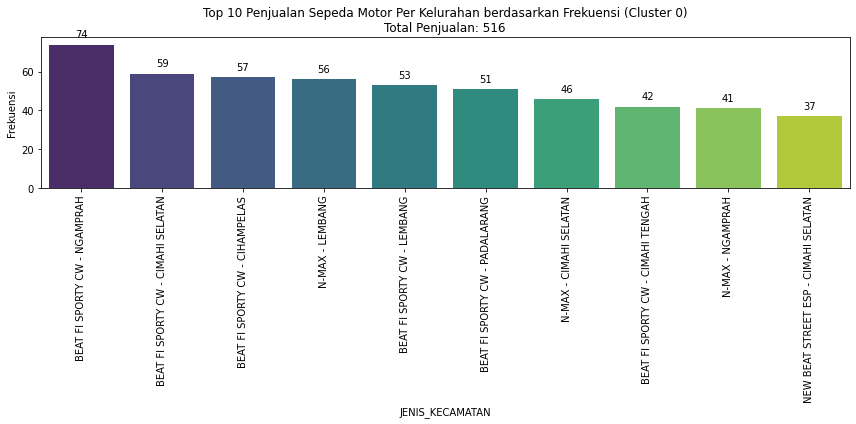

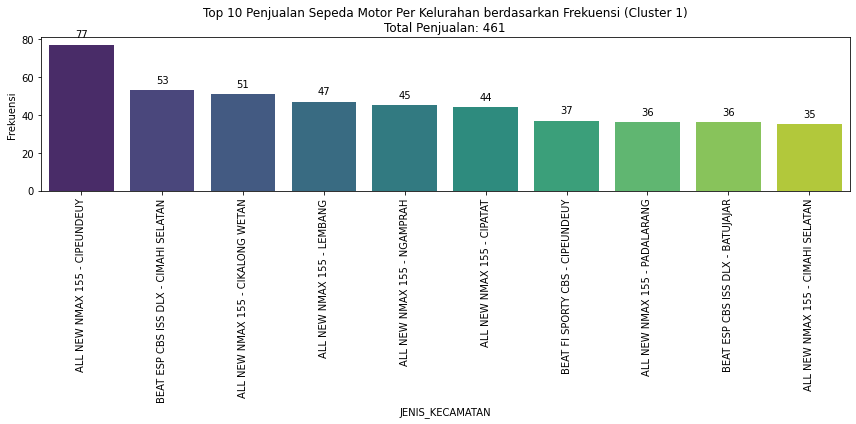

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'JENIS' dan 'KELURAHAN' menjadi satu kolom baru
dataset['JENIS_KECAMATAN'] = dataset['JENIS'] + ' - ' + dataset['KECAMATAN']

# Memfilter data hanya untuk yang memiliki 100 baris atau lebih
if len(dataset) >= 100:
    # Membuat fungsi untuk membuat plot bar
    def create_cluster_bar_plot(data, cluster_number):
        cluster_data = data[data['f_cluster'] == cluster_number]
        if not cluster_data.empty:  # Periksa apakah ada data yang cocok dengan kluster
            plt.figure(figsize=(12, 6))
            jenis_kabupaten_counts = cluster_data['JENIS_KECAMATAN'].value_counts().head(10)
            total_penjualan = jenis_kabupaten_counts.sum()
            ax = sns.barplot(x=jenis_kabupaten_counts.index, y=jenis_kabupaten_counts.values, palette='viridis')
            plt.xlabel('JENIS_KECAMATAN')
            plt.ylabel('Frekuensi')
            plt.title(f'Top 10 Penjualan Sepeda Motor Per Kelurahan berdasarkan Frekuensi (Cluster {cluster_number})\nTotal Penjualan: {total_penjualan}')
            plt.xticks(rotation=90)
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Tidak ada data untuk Cluster {cluster_number}.")

    # Membuat plot bar untuk Cluster 1
    create_cluster_bar_plot(dataset, cluster_number=0)

    # Membuat plot bar untuk Cluster 2
    create_cluster_bar_plot(dataset, cluster_number=1)
else:
    print("Data tidak mencukupi untuk menampilkan plot bar.")


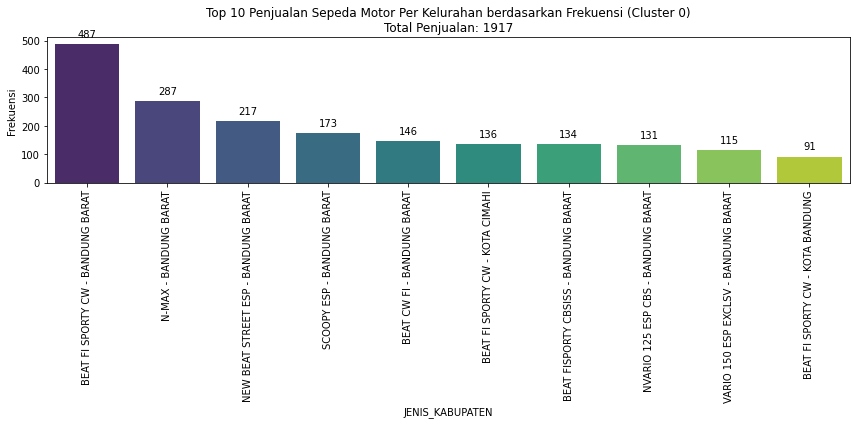

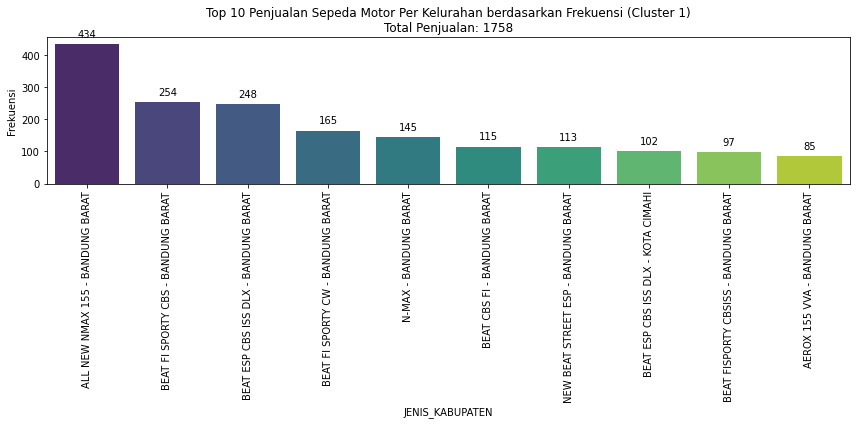

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'JENIS' dan 'KELURAHAN' menjadi satu kolom baru
dataset['JENIS_KABUPATEN'] = dataset['JENIS'] + ' - ' + dataset['KABUPATEN']

# Memfilter data hanya untuk yang memiliki 100 baris atau lebih
if len(dataset) >= 100:
    # Membuat fungsi untuk membuat plot bar
    def create_cluster_bar_plot(data, cluster_number):
        cluster_data = data[data['f_cluster'] == cluster_number]
        if not cluster_data.empty:  # Periksa apakah ada data yang cocok dengan kluster
            plt.figure(figsize=(12, 6))
            jenis_kabupaten_counts = cluster_data['JENIS_KABUPATEN'].value_counts().head(10)
            total_penjualan = jenis_kabupaten_counts.sum()
            ax = sns.barplot(x=jenis_kabupaten_counts.index, y=jenis_kabupaten_counts.values, palette='viridis')
            plt.xlabel('JENIS_KABUPATEN')
            plt.ylabel('Frekuensi')
            plt.title(f'Top 10 Penjualan Sepeda Motor Per Kelurahan berdasarkan Frekuensi (Cluster {cluster_number})\nTotal Penjualan: {total_penjualan}')
            plt.xticks(rotation=90)
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Tidak ada data untuk Cluster {cluster_number}.")

    # Membuat plot bar untuk Cluster 1
    create_cluster_bar_plot(dataset, cluster_number=0)

    # Membuat plot bar untuk Cluster 2
    create_cluster_bar_plot(dataset, cluster_number=1)
else:
    print("Data tidak mencukupi untuk menampilkan plot bar.")


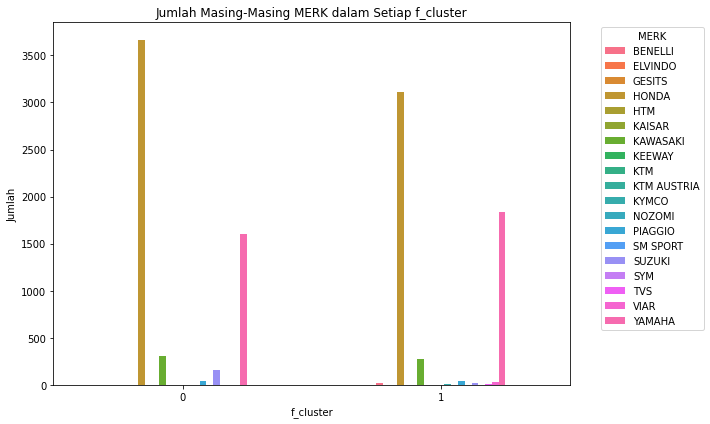

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari CSV
dataset = pd.read_csv('medoids.csv')

# Menggabungkan kolom 'MERK' dan 'f_cluster' menjadi 'MERK_CLUSTER'
dataset['MERK_CLUSTER'] = dataset['MERK'] + ' - ' + dataset['f_cluster'].astype(str)

# Menghitung frekuensi kemunculan kombinasi 'MERK_CLUSTER'
merk_cluster_counts = dataset['MERK_CLUSTER'].value_counts()

# Mengelompokkan berdasarkan 'f_cluster' dan menghitung jumlah masing-masing 'MERK'
merk_group_by_cluster = dataset.groupby('f_cluster')['MERK'].value_counts()

# Membuat palet warna yang berbeda untuk setiap 'MERK'
merk_palette = sns.color_palette("husl", n_colors=len(dataset['MERK'].unique()))

# Membuat plot bar untuk Jumlah Masing-Masing MERK dalam Setiap f_cluster
fig, ax = plt.subplots(figsize=(10, 6))
merk_group_by_cluster.unstack().plot(kind='bar', ax=ax, color=merk_palette)
ax.set_xlabel('f_cluster')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Masing-Masing MERK dalam Setiap f_cluster')
ax.legend(title='MERK', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
